# SEE GOOGLE COLAB

In [19]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from PIL import Image
import shutil
import pandas as pd
import cv2
from IPython.display import clear_output
import os
from sklearn import preprocessing
import matplotlib.patches as patches
import time
from sklearn.decomposition import PCA
from termcolor import colored

# For resizing Danlo data from 640x480 to 640x512

# Create Dataset

In [7]:
Haak1_true_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight1/Haak1_true_annot.csv')
Haak1_anomalies_object_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight1/Haak1_ano_object_annot.csv')
Haak1_anomalies_land_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight1/Haak1_ano_land_annot.csv')

Haak3_true_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Haak3_true_annot.csv')
Haak3_anomalies_object_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Haak3_ano_object_annot.csv')
Haak3_anomalies_land_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Haak3_ano_land_annot.csv')

Danilo_true_df = pd.read_csv(r'/Volumes/Samsung_T5/Danilo_data/IR/Danilo_true_annot.csv')
Danilo_anomalies_land_df = pd.read_csv(r'/Volumes/Samsung_T5/Danilo_data/IR/Danilo_ano_land_annot.csv')
Empty_df = pd.read_csv(r'/Volumes/Samsung_T5/Danilo_data/IR/Empty.csv')

In [8]:
# Haak - Flight 1
Haak1_true_train       = Haak1_true_df.sample(frac = 0.7, random_state = 100)
Haak1_true_test        = Haak1_true_df.drop(Haak1_true_train.index)

Haak1_ano_object_train = Haak1_anomalies_object_df.sample(frac = 0.7, random_state = 100)
Haak1_ano_object_test  = Haak1_anomalies_object_df.drop(Haak1_ano_object_train.index)
Haak1_ano_object       = Haak1_anomalies_object_df

Haak1_ano_land_train   = Haak1_anomalies_land_df.sample(frac = 0.7, random_state = 100)
Haak1_ano_land_test    = Haak1_anomalies_land_df.drop(Haak1_ano_land_train.index)
Haak1_ano_land         = Haak1_anomalies_land_df
 
# Haak - Flight 1
Haak3_true             = Haak3_true_df
Haak3_ano_object       = Haak3_anomalies_object_df
Haak3_ano_land         = Haak3_anomalies_land_df

# Danilo
Danilo_true            = Danilo_true_df
Danilo_ano_land        = Danilo_anomalies_land_df
empty                  = Empty_df


'''
Haak1_true_train | Haak1_true_test
Haak1_ano_object
Haak1_ano_land

Haak3_true 
Haak3_ano_object 
Haak3_ano_land 

Danilo_true
empty
Danilo_ano_land
'''

# Only for PCA

In [12]:
directory = '/Volumes/Samsung_T5/Haak_data/Flight1/20170926_norm_1100-3900/'
df = Haak1_true_train
n_files = len(df)

train_imgs = []

j = 0
for i, file in df.iterrows():
    j += 1
    print(str(j) + '/' + str(n_files), end='\r')
    file = str(file[0]).split('.')[0][:] + '.png'
    img = np.array(Image.open(os.path.join(directory, file)))
    train_imgs = [*train_imgs, img]
    
train_imgs = np.array(train_imgs)
print(train_imgs.shape)

len(train_imgs)
train_imgs_flat = train_imgs.reshape(len(train_imgs),-1)
X = train_imgs_flat[:int(12176/4)]
X = np.transpose()
print(X.shape)

(327680, 3044)


# SIMPLE VISUALZATION

In [74]:
len(train_imgs)
train_imgs_flat = train_imgs.reshape(len(train_imgs),-1)
X = train_imgs_flat
X = np.transpose(X)
print(X.shape)

(327680, 12176)


<Figure size 432x288 with 0 Axes>

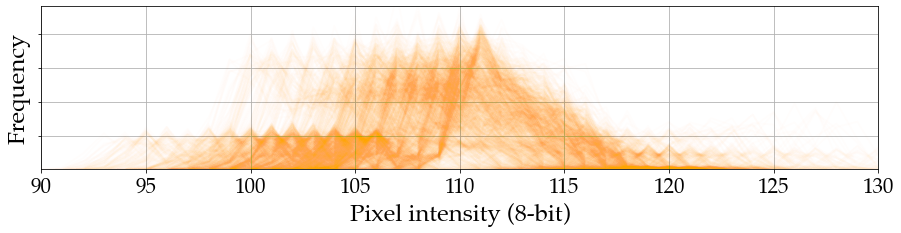

In [13]:
######### FULL RANGE
# F1
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
import matplotlib.patheffects as pe
import numpy as np
from scipy.integrate import simps
from numpy import trapz
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
plt.figure().clear()
plt.close()
plt.cla()
plt.clf()

fig, ax = plt.subplots(figsize=(15, 3))
fontsize = 24
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.grid(True)

###########################################################################################
n_files = len(X)

min_all = 0
max_all = 255

histF1 = []
edgesF1 = []

loops = 1500

# F1
j = 0
for i, row in enumerate(X[:81920]):
    j += 1
    if j%200 == 0:
        print(str(i) + '/' + str(n_files), end='\r')
        hist, edges = np.histogram(row, density=True,  bins=(255), range=(0,255) )
        plt.plot(edges[:-1], hist, color='orange', linewidth=2, alpha=0.01)
        histF1 = [*histF1, hist]
histF1 = np.array(histF1)
edgesF1 = np.array(edges)

#plt.plot(edges[:-1], np.median(histF1,0), color='orange', ls='-', linewidth=3, alpha=1, label='Flight 1 - median',
#        path_effects=[pe.Stroke(linewidth=7, foreground='white'), pe.Normal()])

j = 0
for i, row in enumerate(X[81920:163840]):
    j += 1
    if j%200 == 0:
        print(str(i) + '/' + str(n_files), end='\r')
        hist, edges = np.histogram(row, density=True,  bins=(255), range=(0,255) )
        plt.plot(edges[:-1], hist, color='orange', linewidth=2, alpha=0.01)
        histF1 = [*histF1, hist]
histF1 = np.array(histF1)
edgesF1 = np.array(edges)

#plt.plot(edges[:-1], np.median(histF1,0), color='cyan', ls='-', linewidth=3, alpha=1, label='Flight 1 - median',
#        path_effects=[pe.Stroke(linewidth=7, foreground='white'), pe.Normal()])

j = 0
for i, row in enumerate(X[163840:245760]):
    j += 1
    if j%200 == 0:
        print(str(i) + '/' + str(n_files), end='\r')
        hist, edges = np.histogram(row, density=True,  bins=(255), range=(0,255) )
        plt.plot(edges[:-1], hist, color='orange', linewidth=2, alpha=0.01)
        histF1 = [*histF1, hist]
histF1 = np.array(histF1)
edgesF1 = np.array(edges)

#plt.plot(edges[:-1], np.median(histF1,0), color='orange', ls='-', linewidth=3, alpha=1, label='Flight 1 - median',
#        path_effects=[pe.Stroke(linewidth=7, foreground='white'), pe.Normal()])
        
j = 0
for i, row in enumerate(X[245760:]):
    j += 1
    if j%200 == 0:
        print(str(i) + '/' + str(n_files), end='\r')
        hist, edges = np.histogram(row, density=True,  bins=(255), range=(0,255) )
        plt.plot(edges[:-1], hist, color='orange', linewidth=2, alpha=0.01)
        histF1 = [*histF1, hist]
histF1 = np.array(histF1)
edgesF1 = np.array(edges)

#plt.plot(edges[:-1], np.median(histF1,0), color='orange', ls='-', linewidth=3, alpha=1, label='Flight 1 - median',
#        path_effects=[pe.Stroke(linewidth=7, foreground='white'), pe.Normal()])

#histF1 = np.array(histF1)
#edgesF1 = np.array(edges)

#plt.hlines(y=0, xmin=1500, xmax=1501, colors='blue', ls='-', lw=2.5, label='Flight 1')
#plt.plot(edges[:-1], np.median(histF1,0), color='white', ls='-', linewidth=3, alpha=1)
#plt.plot(edges[:-1], np.median(histF1,0), color='blue', ls='-', linewidth=3, alpha=1, label='Flight 1 - median',
#        path_effects=[pe.Stroke(linewidth=7, foreground='white'), pe.Normal()])

###########################################################################################
plt.xlim((90,130))
plt.ylim((0.001,0.24))
plt.xlabel('Pixel intensity (8-bit)', fontsize=fontsize, fontname='Palatino')
plt.ylabel('Frequency', fontsize=fontsize, fontname='Palatino')
plt.xticks(fontsize=fontsize-3, fontname='Palatino')
plt.yticks(fontsize=fontsize-3, fontname='Palatino')
#plt.vlines(x=[2175,2547], ymin=0, ymax=0.008, colors='teal', ls='--', lw=2.5, label='1st & 99th percentile')

frame1 = plt.gca()
#frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])

#plt.legend(fontsize=fontsize, prop={'size':fontsize-4, 'family': 'Palatino'})
#plt.title('Histogram of IQ')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)

plt.savefig('/Users/ola/Documents/Masteroppgave/Figures/GMM_distribution', bbox_inches='tight')

plt.show()

<Figure size 432x288 with 0 Axes>

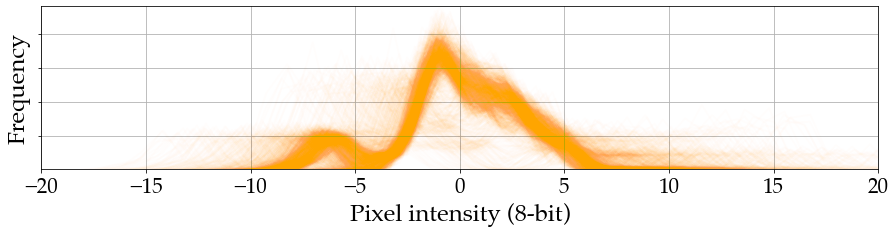

In [16]:
######### FULL RANGE
# F1
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
import matplotlib.patheffects as pe
import numpy as np
from scipy.integrate import simps
from numpy import trapz
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
plt.figure().clear()
plt.close()
plt.cla()
plt.clf()

fig, ax = plt.subplots(figsize=(15, 3))
fontsize = 24
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.grid(True)

###########################################################################################
n_files = len(X)

min_all = 0
max_all = 255

histF1 = []
edgesF1 = []

loops = 1500

# F1
j = 0
for i, row in enumerate(X):
    j += 1
    if j%200 == 0:
        print(str(i) + '/' + str(n_files), end='\r')
        hist, edges = np.histogram(row, density=True,  bins=(255), range=(0,255) )
        
        
        plt.plot(edges[:-1]-row.mean(), hist, color='orange', linewidth=2, alpha=0.01)
        histF1 = [*histF1, hist]
histF1 = np.array(histF1)
edgesF1 = np.array(edges)

#plt.plot(edges[:-1], np.median(histF1,0), color='orange', ls='-', linewidth=3, alpha=1, label='Flight 1 - median',
#        path_effects=[pe.Stroke(linewidth=7, foreground='white'), pe.Normal()])

#plt.plot(edges[:-1], np.median(histF1,0), color='orange', ls='-', linewidth=3, alpha=1, label='Flight 1 - median',
#        path_effects=[pe.Stroke(linewidth=7, foreground='white'), pe.Normal()])

#histF1 = np.array(histF1)
#edgesF1 = np.array(edges)

#plt.hlines(y=0, xmin=1500, xmax=1501, colors='blue', ls='-', lw=2.5, label='Flight 1')
#plt.plot(edges[:-1], np.median(histF1,0), color='white', ls='-', linewidth=3, alpha=1)
#plt.plot(edges[:-1], np.median(histF1,0), color='blue', ls='-', linewidth=3, alpha=1, label='Flight 1 - median',
#        path_effects=[pe.Stroke(linewidth=7, foreground='white'), pe.Normal()])

###########################################################################################
plt.xlim((-20,20))
plt.ylim((0.001,0.24))
plt.xlabel('Pixel intensity (8-bit)', fontsize=fontsize, fontname='Palatino')
plt.ylabel('Frequency', fontsize=fontsize, fontname='Palatino')
plt.xticks(fontsize=fontsize-3, fontname='Palatino')
plt.yticks(fontsize=fontsize-3, fontname='Palatino')
#plt.vlines(x=[2175,2547], ymin=0, ymax=0.008, colors='teal', ls='--', lw=2.5, label='1st & 99th percentile')

frame1 = plt.gca()
#frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])

#plt.legend(fontsize=fontsize, prop={'size':fontsize-4, 'family': 'Palatino'})
#plt.title('Histogram of IQ')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)

plt.savefig('/Users/ola/Documents/Masteroppgave/Figures/GMM_distribution_shifted', bbox_inches='tight')

plt.show()

# PCA VISUALIZATON

In [23]:
from sklearn.decomposition import PCA
import time
%matplotlib inline

start_time = time.time()
components = 25

X_PCA = PCA(n_components = components).fit(X)

print("--- %s seconds ---" % (time.time() - start_time))

#components = 25
#X = train_imgs_flat
#X_PCA = PCA(n_components = 3).fit(X)

--- 195.66766381263733 seconds ---


In [27]:
np.cumsum(X_PCA.explained_variance_ratio_[:components])

array([0.61981389, 0.9295805 , 0.9817403 , 0.98307538, 0.98348992,
       0.98385268, 0.98418135, 0.98450084, 0.98480193, 0.98508868,
       0.98536796, 0.9856131 , 0.98577236, 0.98591853, 0.98604013,
       0.98609023, 0.98613496, 0.98617067, 0.98620581, 0.9862369 ,
       0.986267  , 0.98629637, 0.98632423, 0.98635092, 0.9863765 ])

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

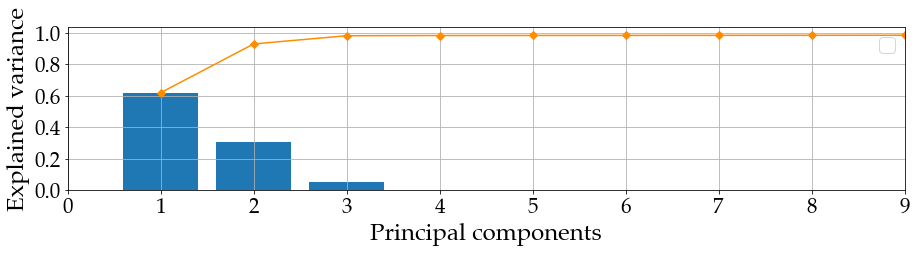

In [28]:
#########
# F1
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
import matplotlib.patheffects as pe
import numpy as np
from scipy.integrate import simps
from numpy import trapz
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
plt.figure().clear()
plt.close()
plt.cla()
plt.clf()

fig, ax = plt.subplots(figsize=(15, 3))
fontsize = 24
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.grid(True)

plt.bar(np.arange(1,components+1),X_PCA.explained_variance_ratio_[:components])
plt.plot(np.arange(1,components+1), np.cumsum(X_PCA.explained_variance_ratio_[:components]),
         color="darkorange", marker="D")


plt.xlim((0,9))
#plt.ylim((0.001,0.155))
plt.xlabel('Principal components', fontsize=fontsize, fontname='Palatino')
plt.ylabel('Explained variance', fontsize=fontsize, fontname='Palatino')
plt.xticks(fontsize=fontsize-3, fontname='Palatino')
plt.yticks(fontsize=fontsize-3, fontname='Palatino')

#ax.set_yscale('log')
frame1 = plt.gca()
#frame1.axes.xaxis.set_ticklabels([])
#frame1.axes.yaxis.set_ticklabels([])

plt.legend(fontsize=fontsize, prop={'size':fontsize-4, 'family': 'Palatino'})
#plt.title('Histogram of IQ')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)

#plt.savefig('/Users/ola/Documents/Masteroppgave/Figures/PCA_pareto.pdf', bbox_inches='tight')

plt.show()

In [41]:
from sklearn.cluster import KMeans

PCA_model = PCA(n_components = 3).fit(X)
PCA_scores = PCA_model.transform(X)

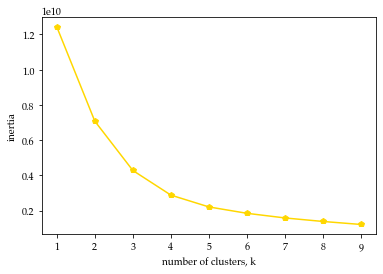

In [42]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_scores)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

In [110]:
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)

In [111]:
kmeans_pca.fit(PCA_scores)

KMeans(n_clusters=3, random_state=42)

In [112]:
PCA_scores.shape

(327680, 3)

In [113]:
kmeans_pca.labels_.shape

(327680,)

In [114]:
kmeans_pca.cluster_centers_.shape

(3, 3)

In [115]:
cluster_center_reconstructed = PCA_model.inverse_transform(kmeans_pca.cluster_centers_)

In [116]:
cluster_center_reconstructed.shape

(3, 3044)

IndexError: index 3 is out of bounds for axis 0 with size 3

<Figure size 432x288 with 0 Axes>

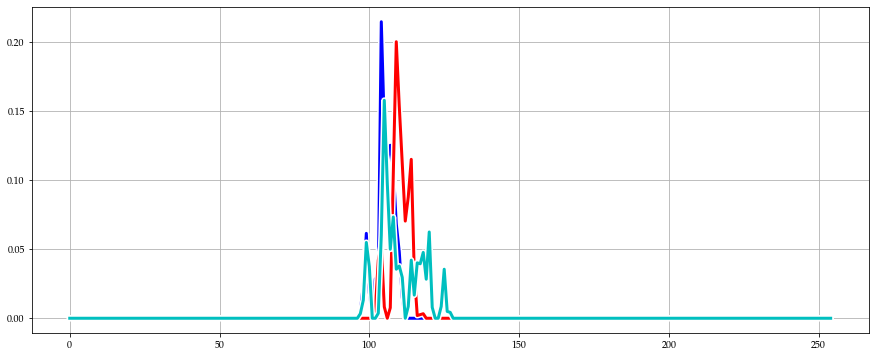

In [117]:
######### 
# F1
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
import matplotlib.patheffects as pe
import numpy as np
from scipy.integrate import simps
from numpy import trapz
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
plt.figure().clear()
plt.close()
plt.cla()
plt.clf()

fig, ax = plt.subplots(figsize=(15, 6))
fontsize = 24
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.grid(True)

hist_center=[]
edges_center=[]

# F1
for img in cluster_center_reconstructed:
    hist, edges = np.histogram(img, 
                   density=True, 
                   bins=255,
                   range=(0,255))

    hist_center = [*hist_center, hist]

hist_center = np.array(hist_center)
edges_center = np.array(edges)


#plt.plot(edges[:-1], yF1, color='b', ls='-', linewidth=3, alpha=1, label='Flight 1 - median',
#        path_effects=[pe.Stroke(linewidth=6, foreground='white'), pe.Normal()])
plt.plot(edges_center[:-1], hist_center[0], color='b', ls='-', linewidth=3, alpha=1, label='Flight 1',
        path_effects=[pe.Stroke(linewidth=6, foreground='white'), pe.Normal()])

#plt.plot(edges[:-1], yF3, color='r', ls='-', linewidth=3, alpha=1, label='Flight 1 - median',
#        path_effects=[pe.Stroke(linewidth=6, foreground='white'), pe.Normal()])
plt.plot(edges_center[:-1], hist_center[1], color='r', ls='-', linewidth=3, alpha=1, label='Flight 2',
        path_effects=[pe.Stroke(linewidth=6, foreground='white'), pe.Normal()])

#plt.plot(edges[:-1], yDAN, color='g', ls='-', linewidth=3, alpha=1, label='Flight 1 - median',
#        path_effects=[pe.Stroke(linewidth=6, foreground='white'), pe.Normal()])
plt.plot(edges_center[:-1], hist_center[2], color='c', ls='-', linewidth=3, alpha=1, label='Flight 3',
        path_effects=[pe.Stroke(linewidth=6, foreground='white'), pe.Normal()])

#plt.plot(edges[:-1], yDAN, color='g', ls='-', linewidth=3, alpha=1, label='Flight 1 - median',
#        path_effects=[pe.Stroke(linewidth=6, foreground='white'), pe.Normal()])
plt.plot(edges_center[:-1], hist_center[3], color='g', ls='-', linewidth=3, alpha=1, label='Flight 3',
        path_effects=[pe.Stroke(linewidth=6, foreground='white'), pe.Normal()])



plt.xlim((50,150))
plt.ylim((0.001,0.25))
plt.xlabel('Pixel intensity (8-bit)', fontsize=fontsize, fontname='Palatino')
plt.ylabel('Frequency', fontsize=fontsize, fontname='Palatino')
plt.xticks(fontsize=fontsize-3, fontname='Palatino')
plt.yticks(fontsize=fontsize-3, fontname='Palatino')

frame1 = plt.gca()
#frame1.axes.xaxis.set_ticklabels([])
#frame1.axes.yaxis.set_ticklabels([])

plt.legend(fontsize=fontsize, prop={'size':fontsize-4, 'family': 'Palatino'})
#plt.title('Histogram of IQ')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)

#plt.savefig('/Users/ola/Documents/Masteroppgave/Figures/F1F2F3_PNG_median_OBJECT.pdf', bbox_inches='tight')

plt.show()

# OFFICIAL

In [ ]:
df = Haak1_true_train
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight1/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak1 - true'
isAnomObject = False
isAnomLand   = False
isTrue       = True

##################################################### HAAK 1
#####################################################
df = Haak1_true_test
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight1/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak1 - true'
isAnomObject = False
isAnomLand   = False
isTrue       = True
#####################################################
df = Haak1_ano_object
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight1/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak1 - object'
isAnomObject = True
isAnomLand   = False
isTrue       = False
#####################################################
df = Haak1_ano_land
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight1/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak1 - land'
isAnomObject = False
isAnomLand   = True
isTrue       = False

##################################################### HAAK 3
#####################################################
df = Haak3_true
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight3/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak3 - true'
isAnomObject = False
isAnomLand   = False
isTrue       = True
#####################################################
df = Haak3_ano_object
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight3/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak3 - object'
isAnomObject = True
isAnomLand   = False
isTrue       = False
#####################################################
df = Haak3_ano_land
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight3/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak3 - land'
isAnomObject = False
isAnomLand   = True
isTrue       = False

##################################################### DANILO
#####################################################
df = Danilo_true
directory = '/Volumes/Samsung_T5/Danilo_data_All/IR/All-Frames-Simple/' # 8-bit
scenery = 'Danilo - true'
isAnomObject = False
isAnomLand   = False
isTrue       = True
#####################################################
df = Danilo_ano_land
directory = '/Volumes/Samsung_T5/Danilo_data_All/IR/All-Frames-Simple/' # 8-bit
scenery = 'Danilo - land'
isAnomObject = False
isAnomLand   = True
isTrue       = False

In [ ]:
df = Haak1_true_test
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight1/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak1 - true'
isAnomObject = False
isAnomLand   = False
isTrue       = True
#####################################################

#####################################################
area_threshold = 20
threshold_mask = 6.4
#threshold_mask = 10
gaussian_mask = 5

doPlots = False
doExhaustivePlots = False
doErrorValidation = True
doNMSValidation = False
#####################################################
n_files = len(df)
start = 0
end = n_files
#end = 5

metrics = {'FPs':0, 'FNs':0, 'TPs': 0}
j = 0
#####################################################
for i, row in df[start:end].iterrows():
    j += 1
    ############################
    true_boxes = []
    pred_boxes = []
    intersection_boxes = []
    FP, FN, TP = 0,0,0
    ############################
    
    print(str(j) + '/' + str(n_files), end='\r')
    file = row['file']
    
    img = np.array(Image.open(os.path.join(directory, file)))

    ##################### ALGORITHM #####################
    # CANNY
    img_canny = cv2.Canny(img, 6.4, 3*6.4)

    # DILATE
    kernel = np.ones((5,5), np.uint8)
    img_dil = cv2.dilate(img_canny, kernel, iterations = 1)
    
    # ERODE
    kernel = np.ones((5,5), np.uint8)
    img_ero = cv2.erode(img_dil, kernel, iterations = 1)
    
    mask = img_ero
    
    #####################
    if isAnomLand or isAnomObject:
        true_boxes = [row[['x','y','w','h']].to_numpy()]

    # Pred Boxes
    pred_boxes = boxes_from_mask(mask, area_threshold)
    
    if (not isAnomLand) and (len(pred_boxes) >= 2):
        if doNMSValidation: 
            plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
            print(colored('NON MAXIMAL SUPRESSION', 'magenta'))
            print('Prior: {}'.format(pred_boxes))
            pred_boxes = pred_box_IoU_cancellation(pred_boxes)
            print('Post: {}'.format(pred_boxes))
            _ = input()    
        else:
            pred_boxes = pred_box_IoU_cancellation(pred_boxes)
    
    pre_land_boxes = []
    if isAnomLand:
        pre_land_boxes = pred_boxes
        pred_boxes = covering_rectangle_from_square_boxes(pred_boxes) # Combine small boxes

    # Calculate accuracy
    intersection_boxes, FP, FN, TP = compare_predictions_with_truth(pred_boxes, true_boxes)


    # Metrics
    update = {'FPs':FP, 'FNs':FN, 'TPs': TP}
    metrics = {i: metrics.get(i, 0) + update.get(i, 0) for i in set(update)}

    # Plot
    title = 'FP: {}, FN: {}, TP: {} | {}'.format(FP, FN, TP, scenery)

    if doPlots:
        plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
        
    if doExhaustivePlots:
        exhaustive_plot_results(img, img_canny, img_dil, mask, pred_boxes, true_boxes, intersection_boxes, pre_land_boxes, title)

    if doErrorValidation:
        if FP:
            plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
            print(colored('FALSE POSITIVE, total: {}'.format(metrics['FPs']), 'cyan'))
            print(row)
            print(pred_boxes)
            _ = input()
        if FN:
            plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
            print(colored('FALSE NEGATIVE, total: {}'.format(metrics['FNs']), 'red'))
            print(row)
            _ = input()
        
    
print('\n\n######## frames: {} mask threshold: {} | gaussian threshold: {} ########'.format(n_files, threshold_mask, gaussian_mask)) 
print('Object: {}'.format(metrics))
print('Recall: {:.4f}'.format(metrics['TPs']/(metrics['FNs']+metrics['TPs']+0.00000001)))
print('Precision: {:.4f}'.format(metrics['TPs']/(metrics['FPs']+metrics['TPs']+0.00000001)))



#        Flight 1    Flight 2      Flight 3
#   Rec
#   Prec